### Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [64]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from matplotlib import pyplot


# Date Loading

In [4]:
from torchvision.transforms.transforms import ToTensor
import torchvision 
import torchvision.transforms as transforms
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)


torch.Size([128, 3, 32, 32])
torch.Size([3, 32, 32])
4


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:706: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x, subok=True, copy=copy)


ValueError: ignored

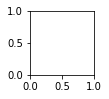

In [63]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)
print(images[2].shape)
print(labels[2].item())
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainset[i])
# show the figure
pyplot.show()

### Visualise the DATA

In [7]:
img=images[2]
print(type(images[2]))

<class 'torch.Tensor'>


In [8]:
npimg=img.numpy()
print(type(npimg))
print(npimg.shape)

<class 'numpy.ndarray'>
(3, 32, 32)


(32, 32, 3)


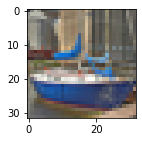

In [9]:
npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)
plt.figure(figsize=(2,2))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

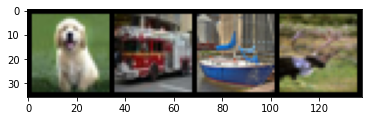

dog truck ship deer


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4) ))

# Single Convolution Layer

# Single Convolutional Layer

In [12]:
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self):
      super(FirstCNN,self).__init__()
      self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))
  def forward(self,x):
    x=self.conv1(x)
    return x
        

In [13]:
net=FirstCNN()
out=net(images)
out.shape
#[[4,->batch 16->output channel, 16->image X axis, 16->image Y axis]]

torch.Size([4, 16, 16, 16])

In [14]:
for param in net.parameters():
  print(param.shape)
#[16->no of filters, 3-> no of channel, 3->x axis, 3->Y axis]  

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [15]:
out1=out[3,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


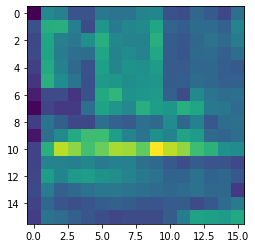

In [16]:
plt.imshow(out[2,0,:,:].detach().numpy())
plt.show()


# Deep Convolution NN

In [17]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,8,3),  #(3,8,3---3->input channel,8 output cha,3->filter size)
        nn.Conv2d(8,16,3)  #(N,3,32,32)->(N,8,30,30)
    )                      #(N,8,30,30)->(N,16,28,28)
  def forward(self,x):
    x=self.model(x)
    return x


In [18]:
net=FirstCNN_v2()
out=net(images)
out.shape

torch.Size([4, 16, 28, 28])

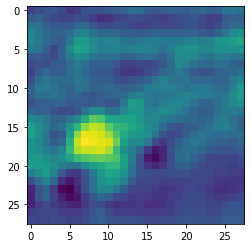

In [59]:
plt.imshow(out[3, 5, :, :].detach().numpy())

In [20]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model=nn.Sequential( #(3,8,3---3->input channel,8 output cha,3->filter size)
        nn.Conv2d(3,6,5),  #(N,3,32,32)->(N,6,28,28)
        nn.AvgPool2d(2,stride=2),#(N,6,28,28)->(N,6,14,14)
        nn.Conv2d(6,16,5) , #(N,6,14,14)->(N,16,10,10)
         nn.AvgPool2d(2,stride=2),#(N,16,10,10)->(N,16,5,5)

    )                  
  def forward(self,x):
    x=self.model(x)
    return x


In [21]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

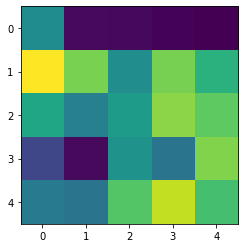

In [22]:
plt.imshow(out[1, 0, :, :].detach().numpy())

# LeNet

In [23]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model=nn.Sequential( #(3,8,3---3->input channel,8 output cha,3->filter size)
          nn.Conv2d(3,6,5),  #(N,3,32,32)->(N,6,28,28)
          nn.Tanh(),
          nn.AvgPool2d(2,stride=2),#(N,6,28,28)->(N,6,14,14)
          nn.Conv2d(6,16,5) , #(N,6,14,14)->(N,16,10,10)
          nn.Tanh(),
          nn.AvgPool2d(2,stride=2),#(N,16,10,10)->(N,16,5,5)
          )                  
        self.fc_model=nn.Sequential(
          nn.Linear(400,120), #(N,400)->(N->120)
          nn.Tanh(),
          nn.Linear(120,84),
          nn.Tanh(),
           nn.Linear(84,10)
        )
    def forward(self,x):
        print(x.shape)
        x=self.cnn_model(x)
        print(x.shape)
        x=x.view(x.size(0),-1)
        print(x.shape)
        x=self.fc_model(x)
        print(x.shape)
        return(x)

In [24]:
net=LeNet()
out=net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [25]:
print(out)

tensor([[ 0.0612,  0.0270, -0.0370, -0.0586,  0.1104, -0.0789, -0.1640,  0.0908,
         -0.0856, -0.1031],
        [ 0.0651,  0.0241, -0.0429, -0.0621,  0.0951, -0.0707, -0.1014,  0.0737,
         -0.1099, -0.1026],
        [ 0.0681,  0.0297, -0.0368, -0.0756,  0.1115, -0.0806, -0.1435,  0.0904,
         -0.0782, -0.0907],
        [ 0.0658,  0.0193, -0.0483, -0.0639,  0.1082, -0.0792, -0.1378,  0.0984,
         -0.0837, -0.0966]], grad_fn=<AddmmBackward0>)


In [26]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([4, 4, 4, 4])


#Training LeNet

In [27]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [28]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


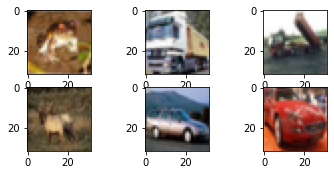

In [69]:
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(6):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [29]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total +=labels.size(0)
    correct +=(pred==labels).sum().item()
  return 100*correct/total  

In [30]:
net=LeNet()


In [31]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 37.81, Train acc: 38.33
Epoch: 1/16, Test acc: 42.10, Train acc: 42.55
Epoch: 2/16, Test acc: 46.02, Train acc: 46.64
Epoch: 3/16, Test acc: 48.66, Train acc: 49.92
Epoch: 4/16, Test acc: 49.69, Train acc: 51.59
Epoch: 5/16, Test acc: 51.08, Train acc: 54.11
Epoch: 6/16, Test acc: 51.17, Train acc: 54.83
Epoch: 7/16, Test acc: 52.71, Train acc: 56.92
Epoch: 8/16, Test acc: 53.42, Train acc: 58.31
Epoch: 9/16, Test acc: 54.09, Train acc: 59.40
Epoch: 10/16, Test acc: 53.55, Train acc: 59.77
Epoch: 11/16, Test acc: 53.77, Train acc: 60.25
Epoch: 12/16, Test acc: 54.63, Train acc: 62.09
Epoch: 13/16, Test acc: 54.74, Train acc: 63.42
Epoch: 14/16, Test acc: 54.08, Train acc: 63.37
Epoch: 15/16, Test acc: 55.29, Train acc: 65.22


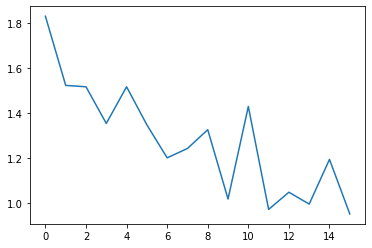

CPU times: user 10min 3s, sys: 5.63 s, total: 10min 8s
Wall time: 10min 7s


In [32]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
#plt.plot(loss_arr)    
plt.plot(loss_epoch_arr)
plt.show()
plt.show()

# GPU Execution


In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [34]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [35]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [36]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 42s, sys: 1.43 s, total: 2min 43s
Wall time: 2min 43s


In [37]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.77, Train acc: 65.37


# Basic Visualisation

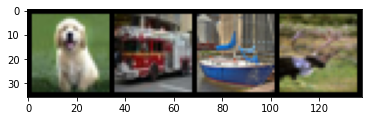

In [38]:
imshow(torchvision.utils.make_grid(images))

In [39]:
net = net.to('cpu')

In [44]:
out = net(images)
print(out.shape)
print(out)

torch.Size([4, 10])
tensor([[-2.4031, -6.5799,  2.5479,  1.9826,  2.3358,  4.7642, -1.4286,  1.0139,
         -2.1157, -3.5553],
        [-3.1169,  2.1283, -1.7007,  0.5986, -0.7904,  0.6231,  0.0213, -1.3213,
         -0.4921,  5.2010],
        [ 0.8652,  3.2123, -0.2936, -1.2689, -1.7496, -2.5638, -1.2411, -1.6644,
          2.9984,  1.2180],
        [-2.7987, -5.9775,  3.4380,  1.9975,  4.7271,  1.9546,  1.7364,  1.8371,
         -5.5493, -4.1493]], grad_fn=<AddmmBackward0>)


In [48]:
out = net.cnn_model[0](images)
out.shape


torch.Size([4, 6, 28, 28])

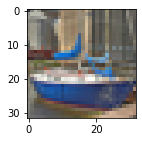

In [52]:
image_id = 2
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


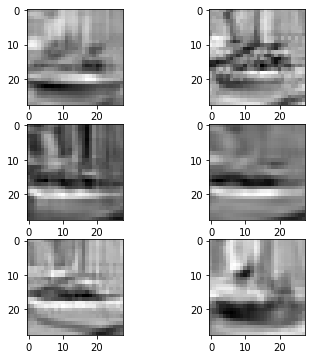

In [53]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()